#Writer: Sajad Gholamhoseyni              98242111

##STEP1:Installation and setup

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##STEP 2 : Data Preprocessing

In [ ]:
from sklearn import datasets,metrics

In [ ]:
#import the dataset
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#matrix of features
x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [ ]:
x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [ ]:
#dependent variable
y=cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x.shape, y.shape

((569, 30), (569,))

In [ ]:
# splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size= 0.2, random_state =0)

In [ ]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x_train)
x1_test = sc.transform(x_test)

In [ ]:
x1_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
x1_train.shape, x1_test.shape

((455, 30), (114, 30))

In [ ]:
x_train = x1_train.reshape(455 , 30, 1)
x_test = x1_test.reshape(114 , 30 , 1)

In [ ]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

#Writer: Mohammadreza sabaghzadeh         97242103

##Step 3: Building a CNN Model

In [ ]:
Cnnmodel = tf.keras.models.Sequential()

In [ ]:
#First CNN Layer
Cnnmodel.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30, 1)))

Cnnmodel.add(tf.keras.layers.BatchNormalization())

Cnnmodel.add(tf.keras.layers.Dropout(0.2))

In [ ]:
#Second CNN Layer
Cnnmodel.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))

Cnnmodel.add(tf.keras.layers.BatchNormalization())

Cnnmodel.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Flattening Layer
Cnnmodel.add(tf.keras.layers.Flatten())

In [ ]:
#Dense Layer
Cnnmodel.add(tf.keras.layers.Dense(units=64, activation='relu'))

#Output Layer
Cnnmodel.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
Cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [ ]:
#Compiling

opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

Cnnmodel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

##Step 4: Training The CNN Model

In [ ]:
history = Cnnmodel.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


15/15 [==============================] - 2s 20ms/step - loss: 1.0292 - accuracy: 0.3934 - val_loss: 0.6527 - val_accuracy: 0.6930
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6287 - accuracy: 0.6440 - val_loss: 0.6134 - val_accuracy: 0.8421
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4197 - accuracy: 0.7912 - val_loss: 0.5785 - val_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.8725 - val_loss: 0.5473 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.9121 - val_loss: 0.5186 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.9143 - val_loss: 0.4872 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1909 - accuracy: 0.9319 - val_loss: 0.4571 - val_accuracy: 0.9386
Epoch 8/100
15/15 [=====

##Step 5:Building a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state=0)

In [ ]:
classifier_lr.fit(x1_train, y_train)

LogisticRegression(random_state=0)

##Step 6:Building a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x1_train, y_train)

RandomForestClassifier(random_state=0)

##Step 7:Building a XGBoost Model

In [ ]:
import xgboost as xgb

In [ ]:
dtrain_reg = xgb.DMatrix(x1_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(x1_test, y_test, enable_categorical=True)

In [ ]:
params = {'eta': 0.03, 'max_depth': 180,
         'subsample': 1.0, 'colsample_bytree': 0.95,
         'alpha': 0.1, 'lambda': 0.15, 'gamma': 0.1,
         'objective': 'binary:logistic', 'eval_metric': 'rmse',
         'silent': 1, 'min_child_weight': 0.1, 'n_jobs': -1}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [ ]:
XGmodel = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=10000,
   evals=evals,
   early_stopping_rounds=50
)

[13:39:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:0.48559	validation-rmse:0.48681
[1]	train-rmse:0.47158	validation-rmse:0.47405
[2]	train-rmse:0.45799	validation-rmse:0.46175
[3]	train-rmse:0.44482	validation-rmse:0.44995
[4]	train-rmse:0.43206	validation-rmse:0.43855
[5]	train-rmse:0.41968	validation-rmse:0.42762
[6]	train-rmse:0.40769	validation-rmse:0.41730
[7]	train-rmse:0.39605	validation-rmse:0.40702
[8]	train-rmse:0.38477	validation-rmse:0.39723
[9]	train-rmse:0.37384	validation-rmse:0.38782
[10]	train-rmse:0.36325	validation-rmse:0.37879
[11]	train-rmse:0.35297	validation-rmse:0.37016
[12]	train-rmse:0.34308	validation-rmse:0.36186
[13]	train-rmse:0.33344	validation-rmse:0.35392
[14]	train-rmse:0.32416	validation-rmse:0.34543
[15]	train-rmse:0.31509	validation-rmse:0.33810
[16]	train-rmse:0.30627	validation-rmse:0.33106
[17]	train-rmse:0.29773	validation-rmse:0.32434
[18]	t

#Writer: Ahmad Arefi          98242101

##Step 8:Model Prediction

In [ ]:
y_pred = Cnnmodel.predict(x_test)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

4/4 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred[12])
print(y_test[12])

[1]
1


In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(44, 3, 0, 67)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

##Step 9:Accuracy , F1 score , Precision , Recall

Accuracy , F1 score , Precision , Recall for Cnn Model

In [ ]:
acc_Cnn = accuracy_score(y_test,y_pred)
f1_Cnn = f1_score(y_test,y_pred)
prec_Cnn = precision_score(y_test,y_pred)
rec_Cnn = recall_score(y_test,y_pred)
result_CNN = pd.DataFrame([['Cnn Model',acc_Cnn,f1_Cnn,prec_Cnn,rec_Cnn]],
                   columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
result_CNN

Model  Accuracy  F1 Score  Precision  Recall
0  Cnn Model  0.973684  0.978102   0.957143     1.0

Learning Curve

In [ ]:
def learning_curve(history,epoch):

    # training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()

    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()

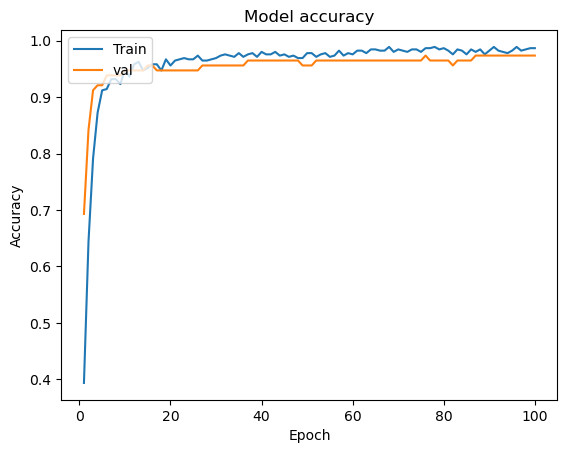

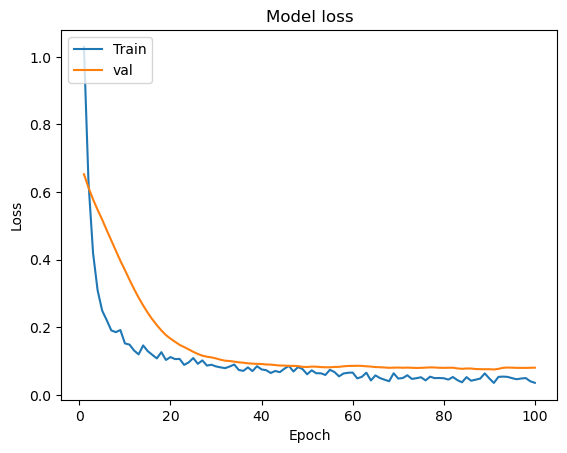

In [ ]:
learning_curve(history, 100)

Accuracy , F1 score , Precision , Recall for Logistic Regression Model

In [ ]:
y_predlg = classifier_lr.predict(x1_test)

In [ ]:
acc_lg = accuracy_score(y_test,y_predlg)
f1_lg = f1_score(y_test,y_predlg)
prec_lg = precision_score(y_test,y_predlg)
rec_lg = recall_score(y_test,y_predlg)
result_lg = pd.DataFrame([['Logistic Regression Model',acc_lg,f1_lg,prec_lg,rec_lg]],
                   columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
result_lg

Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression Model  0.964912  0.970149   0.970149  0.970149

Accuracy , F1 score , Precision , Recall for Random Forest Model

In [ ]:
y_predrf = classifier_rf.predict(x1_test)

In [ ]:
acc_rf = accuracy_score(y_test,y_predrf)
f1_rf = f1_score(y_test,y_predrf)
prec_rf = precision_score(y_test,y_predrf)
rec_rf = recall_score(y_test,y_predrf)
result_rf = pd.DataFrame([['Random Forest Model',acc_rf,f1_rf,prec_rf,rec_rf]],
                   columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
result_rf

Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest Model  0.964912  0.969697   0.984615  0.955224

Accuracy , F1 score , Precision , Recall for XGBoost Model

In [ ]:
y_predXG = XGmodel.predict(dtest_reg)
y_predXG = np.where(y_predXG > 0.5, 1, 0)

In [ ]:
acc_xg = accuracy_score(y_test,y_predXG)
f1_xg = f1_score(y_test,y_predXG)
prec_xg = precision_score(y_test,y_predXG)
rec_xg = recall_score(y_test,y_predXG)
result_xg = pd.DataFrame([['XGBoost Model',acc_xg,f1_xg,prec_xg,rec_xg]],
                   columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
result_xg

Model  Accuracy  F1 Score  Precision    Recall
0  XGBoost Model  0.964912  0.970149   0.970149  0.970149